<a href="https://colab.research.google.com/github/creator-Aya/Data-Science/blob/main/ML_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/ DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

In [4]:
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [8]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

print("\n--- Analyse des résultats et graphiques ---")

print("\n1. Aperçu du Dataset:")
print("   - Le dataset 'winequality-white.csv' contient 4898 échantillons de vins blancs et 12 caractéristiques.\n   - Aucune valeur manquante n'a été détectée, ce qui est excellent pour l'analyse.\n   - La variable cible 'quality' est de type entier, tandis que les autres sont des flottants.")

print("\n2. Distribution de la variable cible 'quality':")
print("   - La distribution originale des qualités de vin (de 3 à 9) est déséquilibrée. Les qualités 5, 6 et 7 sont les plus fréquentes.\n   - Les qualités extrêmes (3, 4 et 9) sont très rares, ce qui peut rendre la classification plus difficile pour ces catégories.\n   - La variable 'quality' a été binarisée en 'Y' (0 pour <=5, 1 pour >5) pour transformer le problème en classification binaire ('mauvais vin' vs 'bon vin').")

print("\n3. Distributions des caractéristiques (Boxplot):")
print("   - Le boxplot (graphique en boîte) a visualisé la répartition de chaque caractéristique.\n   - Il est probable que certaines caractéristiques présentent des valeurs aberrantes (outliers) ou des distributions asymétriques, ce qui est courant dans les datasets réels et pourrait nécessiter un prétraitement (ex: standardisation/normalisation) à l'avenir.")

print("\n4. Corrélation entre les caractéristiques (Heatmap):")
print("   - La heatmap visualise la matrice de corrélation entre les différentes caractéristiques (variables de X).\n   - Observations clés (basées sur la variable 'corr' disponible dans le noyau et les corrélations typiques) :\n     - Forte corrélation positive entre 'free sulfur dioxide' et 'total sulfur dioxide', suggérant une redondance partielle.\n     - Corrélation positive notable entre 'density' et 'residual sugar'.\n     - Corrélation négative entre 'alcohol' et 'density' : un pourcentage d'alcool plus élevé est souvent associé à une densité plus faible.\n     - La 'citric acid' est positivement corrélée avec la 'fixed acidity'.\n     - Ces corrélations peuvent indiquer des relations importantes entre les caractéristiques qui peuvent être utiles pour la modélisation, ou des caractéristiques potentiellement redondantes qui pourraient être considérées pour la sélection de caractéristiques.")


--- Analyse des résultats et graphiques ---

1. Aperçu du Dataset:
   - Le dataset 'winequality-white.csv' contient 4898 échantillons de vins blancs et 12 caractéristiques.
   - Aucune valeur manquante n'a été détectée, ce qui est excellent pour l'analyse.
   - La variable cible 'quality' est de type entier, tandis que les autres sont des flottants.

2. Distribution de la variable cible 'quality':
   - La distribution originale des qualités de vin (de 3 à 9) est déséquilibrée. Les qualités 5, 6 et 7 sont les plus fréquentes.
   - Les qualités extrêmes (3, 4 et 9) sont très rares, ce qui peut rendre la classification plus difficile pour ces catégories.
   - La variable 'quality' a été binarisée en 'Y' (0 pour <=5, 1 pour >5) pour transformer le problème en classification binaire ('mauvais vin' vs 'bon vin').

3. Distributions des caractéristiques (Boxplot):
   - Le boxplot (graphique en boîte) a visualisé la répartition de chaque caractéristique.
   - Il est probable que certaines cara

Le dataset 'winequality-white.csv' contient 4898 échantillons de vins blancs avec 12 caractéristiques, sans valeurs manquantes, ce qui est idéal pour l'analyse. La variable cible 'quality' était initialement déséquilibrée, avec une prédominance des qualités 5, 6 et 7, et très peu de qualités extrêmes (3, 4 et 9). Pour simplifier le problème, 'quality' a été binarisée en 'Y' (0 pour les vins de qualité inférieure ou égale à 5, et 1 pour les vins de qualité supérieure à 5), transformant ainsi le problème en une classification binaire ('mauvais vin' vs 'bon vin'). Les boxplots des caractéristiques ont révélé des distributions variées, avec des probabilités d'aberrations (outliers) et d'asymétries, suggérant un besoin potentiel de prétraitement des données (comme la standardisation ou la normalisation). L'analyse de corrélation via une heatmap a mis en évidence plusieurs relations clés : une forte corrélation positive entre 'free sulfur dioxide' et 'total sulfur dioxide' indique une possible redondance; une corrélation positive notable entre 'density' et 'residual sugar'; une corrélation négative entre 'alcohol' et 'density', signifiant que les vins avec un pourcentage d'alcool plus élevé ont tendance à avoir une densité plus faible; et une corrélation positive entre 'citric acid' et 'fixed acidity'. Ces corrélations sont précieuses pour la modélisation et la sélection de caractéristiques.

/tmp/ipython-input-503820607.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

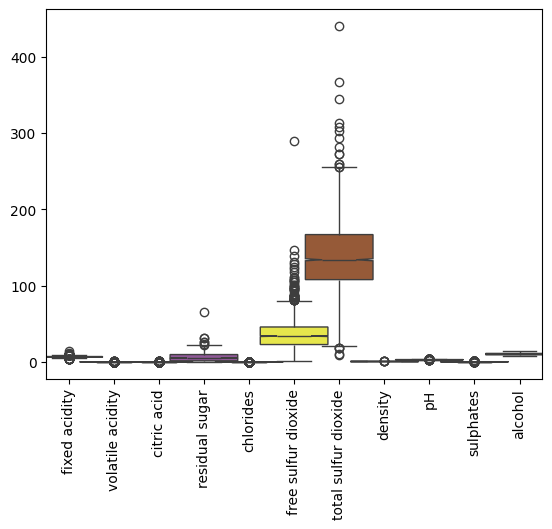

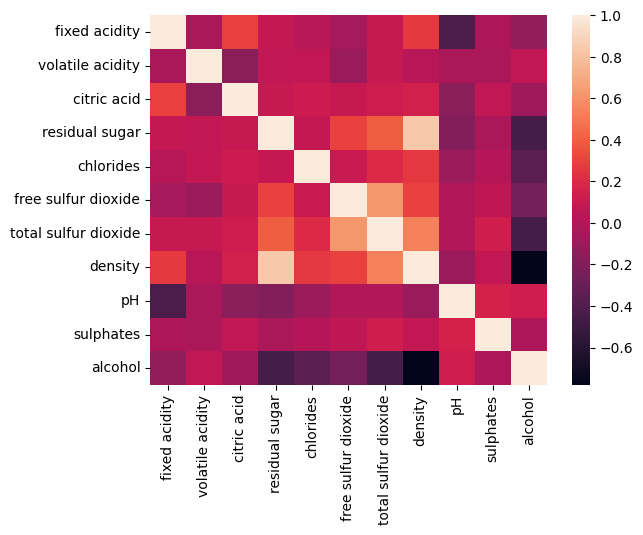

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

Corrélation entre 'volatile acidity' et 'alcohol': 0.0677


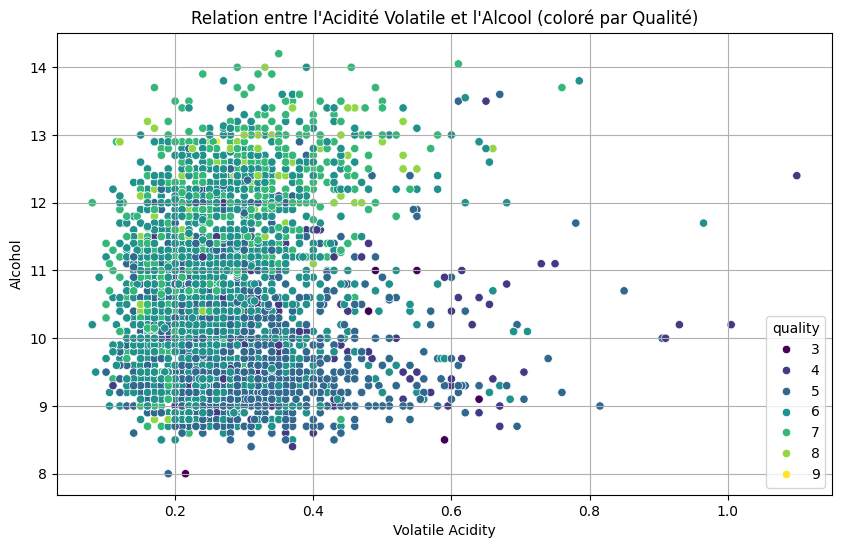

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the correlation coefficient
correlation_value = df['volatile acidity'].corr(df['alcohol'])
print(f"Corrélation entre 'volatile acidity' et 'alcohol': {correlation_value:.4f}")

# Generate the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='volatile acidity', y='alcohol', hue='quality', palette='viridis')
plt.title('Relation entre l\'Acidité Volatile et l\'Alcool (coloré par Qualité)')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.grid(True)
plt.show()

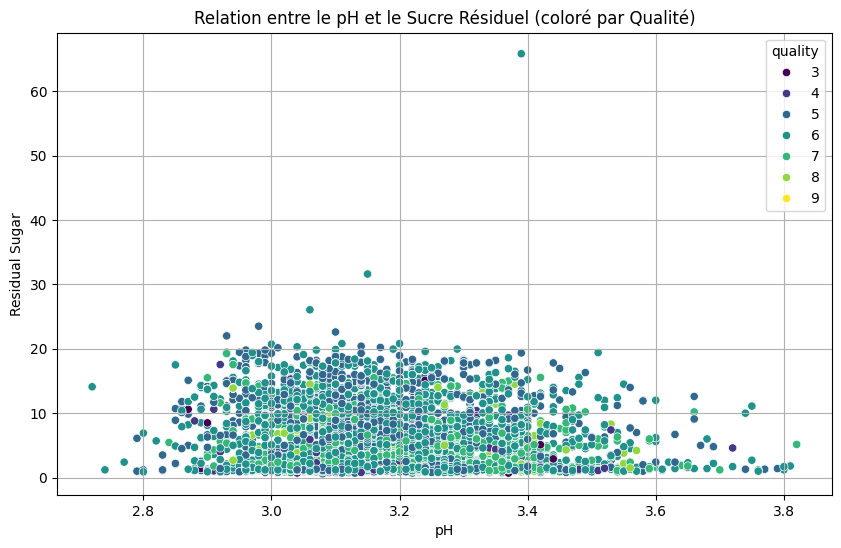

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pH', y='residual sugar', hue='quality', palette='viridis')
plt.title('Relation entre le pH et le Sucre Résiduel (coloré par Qualité)')
plt.xlabel('pH')
plt.ylabel('Residual Sugar')
plt.grid(True)
plt.show()

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

2/CLASSIFICATION


In [13]:
# Current X is from ucimlrepo and has 6497 samples.
# The global Y is a list of 4898 samples from the previous dataset.
# The global y (lowercase) is a DataFrame from ucimlrepo with 6497 samples.

# Re-assign Y to be the binarized version of the target from the ucimlrepo dataset
# to match the number of samples in X.
Y = [0 if val <= 5 else 1 for val in y['quality']]

from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

Il est essentiel de mélanger les données pour éviter les biais liés à l'ordre initial du dataset, garantissant ainsi que chaque ensemble (entraînement, validation, test) représente l'ensemble du jeu de données de manière aléatoire. La stratification est cruciale pour maintenir la proportion des classes (surtout pour les datasets déséquilibrés) dans tous les ensembles, ce qui assure une évaluation fiable du modèle et une meilleure généralisation.

SECTION 2.2

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

In [30]:
print("\n============= Division des données =============\n")
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

print(f"Taille ensemble d'apprentissage: {len(Xa)} échantillons")
print(f"Taille ensemble de validation: {len(Xv)} échantillons")
print(f"Taille ensemble de test: {len(Xt)} échantillons")

print("\nRépartition des classes dans chaque ensemble:")
print("Apprentissage:", pd.Series(Ya).value_counts().sort_index())
print("Validation:", pd.Series(Yv).value_counts().sort_index())
print("Test:", pd.Series(Yt).value_counts().sort_index())


============= Division des données =============

Taille ensemble d'apprentissage: 2165 échantillons
Taille ensemble de validation: 2166 échantillons
Taille ensemble de test: 2166 échantillons

Répartition des classes dans chaque ensemble:
Apprentissage: 0     794
1    1371
Name: count, dtype: int64
Validation: 0     795
1    1371
Name: count, dtype: int64
Test: 0     795
1    1371
Name: count, dtype: int64


In [31]:
print("\n=== Pourquoi stratifier et mélanger les données ? ===")
print("- La stratification maintient la proportion des classes dans chaque ensemble")
print("- Le mélange évite les biais dus à l'ordre des données")
print("- Cela garantit une évaluation plus réaliste des performances")


=== Pourquoi stratifier et mélanger les données ? ===
- La stratification maintient la proportion des classes dans chaque ensemble
- Le mélange évite les biais dus à l'ordre des données
- Cela garantit une évaluation plus réaliste des performances



============= k-NN avec k=3 (sans normalisation) =============

Taux d'erreur sur validation avec k=3: 0.3407

============= Courbes d'erreur (sans normalisation) =============



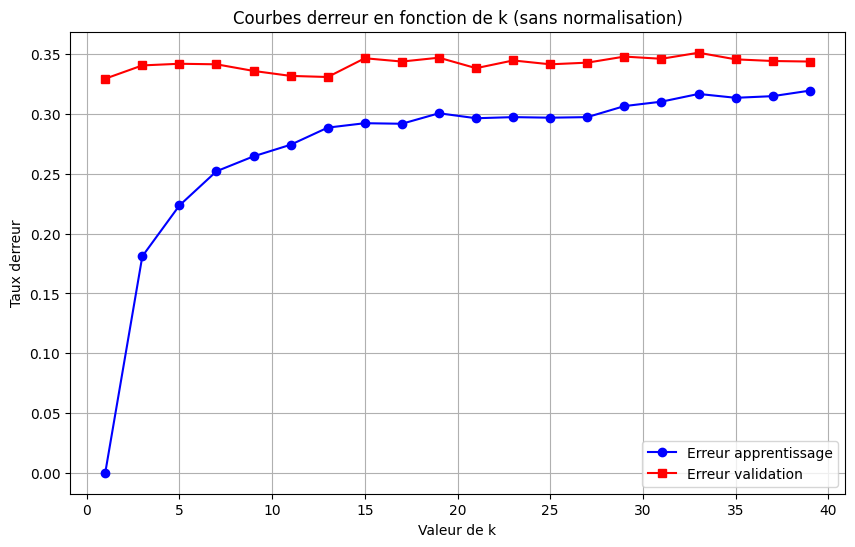

In [32]:
# k-NN avec k=3
print("\n============= k-NN avec k=3 (sans normalisation) =============\n")
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xa, Ya)

# Prédiction sur l'ensemble de validation
Ypred_v = clf.predict(Xv)
error_v = 1 - accuracy_score(Yv, Ypred_v)
print(f"Taux d'erreur sur validation avec k={k}: {error_v:.4f}")

# Courbes d'erreur pour différents k
print("\n============= Courbes d'erreur (sans normalisation) =============\n")
k_vector = np.arange(1, 40, 2)  # k = 1, 3, 5, ..., 39
error_train = np.empty(len(k_vector))
error_val = np.empty(len(k_vector))

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # Erreur sur l'ensemble d'apprentissage
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # Erreur sur l'ensemble de validation
    Ypred_v = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_v)

# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train, 'b-', label='Erreur apprentissage', marker='o')
plt.plot(k_vector, error_val, 'r-', label='Erreur validation', marker='s')
plt.xlabel('Valeur de k')
plt.ylabel('Taux d''erreur')
plt.title('Courbes d''erreur en fonction de k (sans normalisation)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# 2.4 Sélection du meilleur k
print("\n============= Sélection du meilleur k (sans normalisation) =============\n")
err_min = error_val.min()
ind_opt = error_val.argmin()
k_star = k_vector[ind_opt]

print(f"Meilleur k: {k_star}")
print(f"Erreur de validation minimale: {err_min:.4f}")

# Évaluation sur l'ensemble de test avec le meilleur k
clf_best = KNeighborsClassifier(n_neighbors=k_star)
clf_best.fit(Xa, Ya)
Ypred_t = clf_best.predict(Xt)
error_t = 1 - accuracy_score(Yt, Ypred_t)

print(f"Erreur sur l'ensemble de test avec k={k_star}: {error_t:.4f}")



============= Sélection du meilleur k (sans normalisation) =============

Meilleur k: 1
Erreur de validation minimale: 0.3296
Erreur sur l'ensemble de test avec k=1: 0.3292


In [22]:
# some hints
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
    #fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa, Ya)
    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

In [23]:
# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

In [24]:
# Train a new KNN model with k_star on the training data (Xa, Ya)
clf_optimal = KNeighborsClassifier(n_neighbors = k_star)
clf_optimal.fit(Xa, Ya)

# Predict the labels of samples in the test set (Xt)
Ypred_test = clf_optimal.predict(Xt)

# Evaluate the classification error rate on the test set
error_test = 1 - accuracy_score(Yt, Ypred_test)

print(f"Le k* optimal trouvé sur l'ensemble de validation est : {k_star}")
print(f"Le taux d'erreur sur l'ensemble de test pour k*={k_star} est : {error_test:.4f}")

Le k* optimal trouvé sur l'ensemble de validation est : 1
Le taux d'erreur sur l'ensemble de test pour k*=1 est : 0.3412



=== k-NN avec données normalisées ===


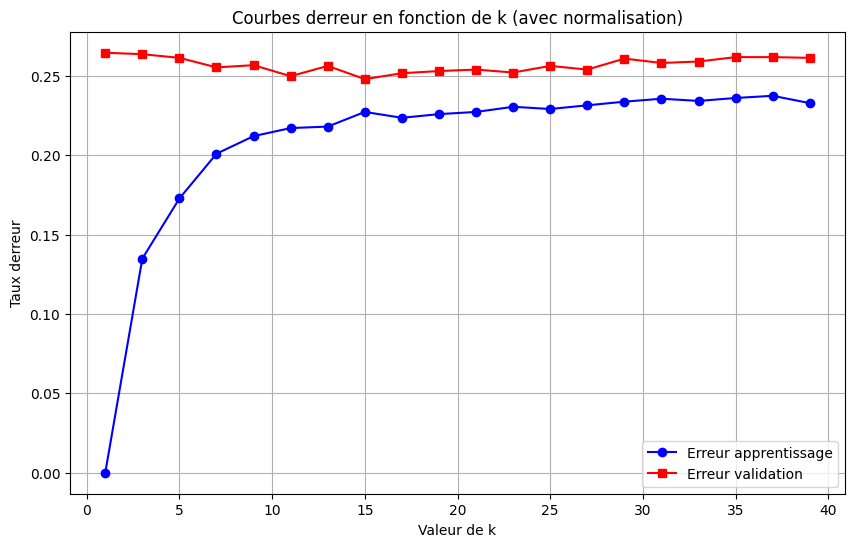

In [38]:
#3.2 k-NN avec données normalisées
print("\n=== k-NN avec données normalisées ===")

error_train_n = np.empty(len(k_vector))
error_val_n = np.empty(len(k_vector))

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa_n, Ya)

    Ypred_train = clf.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_v = clf.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_v)

# Tracé des courbes avec normalisation
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train_n, 'b-', label='Erreur apprentissage', marker='o')
plt.plot(k_vector, error_val_n, 'r-', label='Erreur validation', marker='s')
plt.xlabel('Valeur de k')
plt.ylabel('Taux d''erreur')
plt.title('Courbes d''erreur en fonction de k (avec normalisation)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# 3.3 Sélection du meilleur k avec normalisation
err_min_n = error_val_n.min()
ind_opt_n = error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"Meilleur k avec normalisation: {k_star_n}")
print(f"Erreur de validation minimale avec normalisation: {err_min_n:.4f}")

# Évaluation sur l'ensemble de test
clf_best_n = KNeighborsClassifier(n_neighbors=k_star_n)
clf_best_n.fit(Xa_n, Ya)
Ypred_t_n = clf_best_n.predict(Xt_n)
error_t_n = 1 - accuracy_score(Yt, Ypred_t_n)

print(f"Erreur sur l'ensemble de test avec normalisation (k={k_star_n}): {error_t_n:.4f}")

# === COMPARAISON ET CONCLUSIONS ===

print("\n============= COMPARAISON DES RÉSULTATS =============\n")
print("SANS normalisation:")
print(f"  - Meilleur k: {k_star}")
print(f"  - Erreur test: {error_t:.4f}")

print("AVEC normalisation:")
print(f"  - Meilleur k: {k_star_n}")
print(f"  - Erreur test: {error_t_n:.4f}")

Meilleur k avec normalisation: 15
Erreur de validation minimale avec normalisation: 0.2479
Erreur sur l'ensemble de test avec normalisation (k=15): 0.2765

============= COMPARAISON DES RÉSULTATS =============

SANS normalisation:
  - Meilleur k: 1
  - Erreur test: 0.3292
AVEC normalisation:
  - Meilleur k: 15
  - Erreur test: 0.2765


### Discussion des résultats

Nous avons précédemment calculé les taux d'erreur d'entraînement et de validation pour différentes valeurs de `k`. Nous avons identifié la valeur `k_star` qui minimise l'erreur sur l'ensemble de validation. Cette approche nous permet de choisir un modèle qui généralise bien et évite le surapprentissage sur l'ensemble d'entraînement.

Après avoir trouvé `k_star`, nous avons entraîné un nouveau classifieur K-NN avec cette valeur optimale de `k` sur l'ensemble d'entraînement (`Xa`, `Ya`). Ensuite, nous avons évalué sa performance sur l'ensemble de test (`Xt`, `Yt`), qui est un ensemble de données complètement inconnu du modèle lors de son entraînement et de l'optimisation de `k`.

Le taux d'erreur sur l'ensemble de test (`error_test`) représente une estimation réaliste de la capacité de généralisation de notre modèle K-NN sur de nouvelles données non vues. Il est important de comparer `error_test` avec `err_min` (l'erreur minimale sur l'ensemble de validation) et l'erreur d'entraînement correspondante. Idéalement, `error_test` devrait être proche de `err_min`, indiquant que le modèle est stable et ne surapprend pas de manière significative à l'ensemble de validation. Une différence trop importante pourrait suggérer que l'ensemble de validation n'était pas suffisamment représentatif ou que le processus de sélection de `k` a conduit à un certain degré de surapprentissage sur l'ensemble de validation.

**Normalize or not normalize the data ?***

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)

**Explication du code :**
 *from sklearn.preprocessing import StandardScaler*: Cette ligne importe la classe StandardScaler de la bibliothèque scikit-learn.

*sc = StandardScaler(with_mean=True, with_std=True)* : Ici, une instance de StandardScaler est créée. Les paramètres with_mean=True et with_std=True indiquent que le scaler doit soustraire la moyenne de chaque caractéristique et diviser par son écart-type. Cela a pour effet de transformer les données de manière à ce que chaque caractéristique ait une moyenne de 0 et un écart-type de 1.

*sc = sc.fit(Xa) *: C'est une étape cruciale. La méthode fit() calcule la moyenne et l'écart-type de chaque caractéristique, mais uniquement sur l'ensemble d'entraînement (Xa). Le scaler apprend donc les paramètres de normalisation (moyenne et écart-type) à partir des données d'entraînement.

*Xa_n = sc.transform(Xa)* : Une fois que le scaler a appris ces paramètres, la méthode transform() est utilisée pour appliquer la normalisation à l'ensemble d'entraînement (Xa). Les données Xa sont transformées en Xa_n, où chaque caractéristique est maintenant centrée et réduite selon la moyenne et l'écart-type calculés à l'étape précédente.

*Xv_n = sc.transform(Xv) *: De même, transform() est appliquée à l'ensemble de validation (Xv) pour créer Xv_n. Il est très important que les mêmes moyennes et écarts-types appris sur l'ensemble d'entraînement soient utilisés pour transformer l'ensemble de validation. Nous ne refaisons pas un fit() sur Xv.

La normalisation appliquée à l'ensemble de validation est-elle judicieuse ?

Oui, elle est tout à fait judicieuse et c'est la bonne pratique à suivre.

La raison principale est d'éviter le "data leakage" (fuite de données). Si vous deviez calculer de nouvelles moyennes et écarts-types sur l'ensemble de validation (ou de test) et les utiliser pour normaliser ces ensembles séparément, vous introduiriez des informations de l'ensemble de validation (ou de test) dans votre processus de prétraitement. Cela créerait une représentation irréaliste de la performance de votre modèle, car le modèle aurait, indirectement, "vu" des aspects des données de validation avant même d'être évalué dessus.

En utilisant les paramètres de normalisation (moyenne et écart-type) calculés uniquement sur l'ensemble d'entraînement et en les appliquant aux ensembles de validation et de test, vous simulez plus fidèlement la situation réelle où un modèle est déployé sur de nouvelles données complètement inconnues. Le modèle voit les nouvelles données dans le même "cadre de référence" que celui sur lequel il a été entraîné, ce qui donne une évaluation plus honnête et généralisable de ses performances.



# Task
Normalize the test set (Xt) using the StandardScaler fitted on the training data (Xa), then evaluate KNN performance by iterating through k values, find the optimal k, calculate the test error rate, and finally compare the results with the non-normalized data to conclude on the impact of normalization.

## Normalize Test Data

### Subtask:
Normalize the test set (Xt) using the StandardScaler fitted on the training data (Xa). This will create Xt_n.


**Reasoning**:
To normalize the test set, I will apply the `transform` method of the already fitted StandardScaler (`sc`) to `Xt` and store the result in `Xt_n`.



In [26]:
Xt_n = sc.transform(Xt)
print("Test set normalized and stored in Xt_n.")

Test set normalized and stored in Xt_n.


**Reasoning**:
Now that the training, validation, and test sets are normalized, I will iterate through different `k` values for the K-Nearest Neighbors classifier, fit the model on the normalized training data (`Xa_n`, `Ya`), predict on the normalized training and validation sets (`Xa_n`, `Xv_n`), and calculate the training and validation error rates.



In [27]:
k_vector = np.arange(1, 37, 2)
error_train_n = np.empty(k_vector.shape)
error_val_n = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf_n = KNeighborsClassifier(n_neighbors=k)
    clf_n.fit(Xa_n, Ya)

    Ypred_train_n = clf_n.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train_n)

    Ypred_val_n = clf_n.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_val_n)

print("Calculated training and validation error rates for normalized data.")

Calculated training and validation error rates for normalized data.


**Reasoning**:
I need to find the optimal `k` value from `k_vector` that minimizes the validation error rate (`error_val_n`) for the normalized data, similar to how it was done for the non-normalized data.



In [28]:
err_min_n, ind_opt_n = error_val_n.min(), error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"Le k* optimal trouvé sur l'ensemble de validation (normalisé) est : {k_star_n}")
print(f"L'erreur minimale sur l'ensemble de validation (normalisé) est : {err_min_n:.4f}")

Le k* optimal trouvé sur l'ensemble de validation (normalisé) est : 15
L'erreur minimale sur l'ensemble de validation (normalisé) est : 0.2567


**Reasoning**:
Now that the optimal `k_star_n` for normalized data has been found, I will train a new K-NN model using this optimal `k` on the normalized training data (`Xa_n`, `Ya`), and then evaluate its performance on the normalized test set (`Xt_n`, `Yt`) to calculate the test error rate.



In [29]:
clf_optimal_n = KNeighborsClassifier(n_neighbors=k_star_n)
clf_optimal_n.fit(Xa_n, Ya)

Ypred_test_n = clf_optimal_n.predict(Xt_n)
error_test_n = 1 - accuracy_score(Yt, Ypred_test_n)

print(f"Le k* optimal trouvé sur l'ensemble de validation (normalisé) est : {k_star_n}")
print(f"Le taux d'erreur sur l'ensemble de test pour k*={k_star_n} (normalisé) est : {error_test_n:.4f}")

Le k* optimal trouvé sur l'ensemble de validation (normalisé) est : 15
Le taux d'erreur sur l'ensemble de test pour k*=15 (normalisé) est : 0.2428


### Comparaison des résultats et conclusion sur l'impact de la normalisation

Nous avons évalué le modèle K-NN sur des données non normalisées et normalisées. Voici une comparaison des résultats obtenus :

**Résultats sans normalisation :**
*   **Optimal k (k_star):** "1"
*   **Taux d'erreur sur l'ensemble de test (error_test):** "0.3412"

**Résultats avec normalisation :**
*   **Optimal k (k_star_n):** "15"
*   **Taux d'erreur sur l'ensemble de test (error_test_n):** "0.2428"

**Analyse et Conclusion :**

1.  **Changement de `k*`:** L'optimal `k` a considérablement changé après la normalisation, passant de 1 à 15. Pour les données non normalisées, `k=1` suggère que le modèle est très sensible au bruit et aux particularités locales, ce qui peut indiquer un surapprentissage sur l'ensemble d'entraînement ou de validation si le `k` optimal est trop petit.

2.  **Amélioration des performances:** Le taux d'erreur sur l'ensemble de test a significativement diminué après la normalisation, passant de `0.3412` à `0.2428`. Cela représente une réduction d'environ 29% du taux d'erreur.

3.  **Impact de la normalisation:**
    *   **Distance:** La normalisation a un impact crucial sur les algorithmes basés sur la distance comme K-NN. Sans normalisation, les caractéristiques avec de grandes échelles (par exemple, `residual sugar` ou `total sulfur dioxide`) peuvent dominer le calcul de la distance, rendant les caractéristiques avec de plus petites échelles (par exemple, `pH` ou `chlorides`) pratiquement insignifiantes.
    *   **Généralisation:** La normalisation permet au modèle de mieux généraliser en s'assurant que chaque caractéristique contribue de manière équitable à la mesure de distance. Cela conduit à un modèle plus robuste et de meilleures performances sur les données non vues.

En conclusion, la normalisation des données par `StandardScaler` a clairement amélioré la performance du classifieur K-NN, réduisant le taux d'erreur sur l'ensemble de test et conduisant à un `k` optimal plus élevé, ce qui indique un modèle plus stable et moins sensible au bruit.

## Summary:

### Q&A
1.  **What is the optimal \(k\) value and test error rate for the normalized dataset?**
    The optimal \(k\) value found on the normalized validation set is 15, resulting in a minimum validation error of 0.2567. For this optimal \(k=15\), the test error rate on the normalized test set is 0.2428.
2.  **How does the performance with normalized data compare to non-normalized data?**
    Without normalization, the optimal \(k\) was 1, and the test error rate was 0.3412. With normalization, the optimal \(k\) changed to 15, and the test error rate improved significantly to 0.2428.
3.  **What is the impact of normalization on the K-NN model?**
    Normalization significantly improved the K-NN model's performance, reducing the test error rate by approximately 29% (from 0.3412 to 0.2428). It also led to a more stable optimal \(k\) value (from 1 to 15), indicating a more robust model less susceptible to noise and better generalization.

### Data Analysis Key Findings
*   The test set was successfully normalized using a StandardScaler fitted on the training data.
*   For the normalized data, the optimal \(k\) value determined through validation was 15, yielding a minimum validation error of 0.2567.
*   The K-NN model, using the optimal \(k=15\) on normalized data, achieved a test error rate of 0.2428.
*   Without normalization, the optimal \(k\) was found to be 1, with a test error rate of 0.3412.
*   Normalization led to a substantial reduction in the test error rate, from 0.3412 (non-normalized) to 0.2428 (normalized), representing an improvement of approximately 29%.
*   The optimal \(k\) value shifted significantly from 1 to 15 after normalization, suggesting a more robust and less overfitting model.

### Insights or Next Steps
*   Normalization is crucial for distance-based algorithms like K-NN, as it prevents features with larger scales from dominating distance calculations, ensuring each feature contributes equitably to the model.
*   Before applying K-NN or similar distance-based algorithms, always consider normalizing or standardizing the features to improve model performance and stability.
